![Alt Text](Dic/SVM.png)

In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target


In [7]:
#線形SVMの学習

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size = 0.3, random_state=0)
iris_svm = SVC(kernel='linear', C=1.0, random_state=0)
iris_svm.fit(X_train, y_train)
iris_svm_pre = iris_svm.predict(X_test)
print(accuracy_score(y_test, iris_svm_pre))

0.9777777777777777


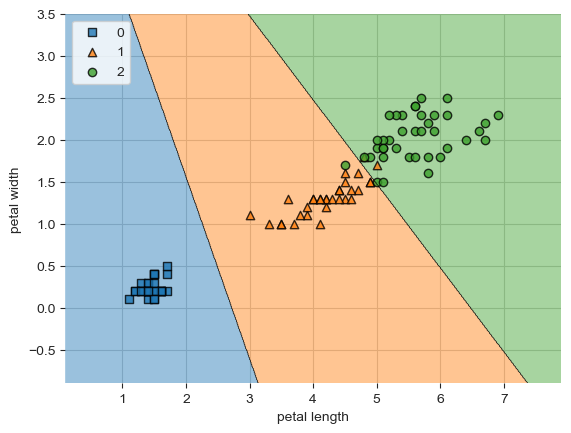

In [8]:
from mlxtend.plotting import plot_decision_regions
#境界面の観察
# 学習データを2次元にする（3次元目と4次元目を抜き出す）；仅使用两列便于可视化
X_train_2d = X_train[:, [2, 3]]
iris_svm_2d = SVC(kernel='linear', C=1.0, random_state=0)
iris_svm_2d.fit(X_train_2d, y_train)
# プロット
plot_decision_regions(X_train_2d, y_train,clf=iris_svm_2d)
# 軸ラベルや凡例の追加
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

In [9]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_X = wine.data
wine_y = wine.target

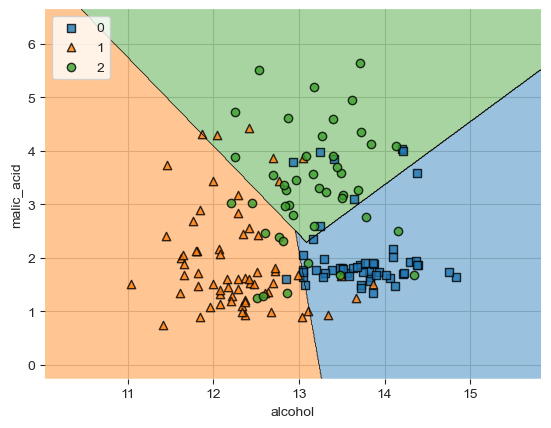

In [12]:
# 学習データと評価データに分割
wine_X_train, wine_X_test, wine_y_train, wine_y_test= train_test_split(wine_X, wine_y, test_size = 0.1,
random_state=0)
# リストdimsに抜き出す次元を2つ入れる
# （たとえば0番目と1番目）
dims = [0, 1]
wine_X_train_2d = wine_X_train[:, dims]
# これで学習
wine_svm_2d = SVC(kernel='linear', C=1.0,
random_state=0)
wine_svm_2d.fit(wine_X_train_2d, wine_y_train)
# プロット
plot_decision_regions(wine_X_train_2d, wine_y_train,
clf=wine_svm_2d)
# 軸ラベルや凡例の追加
plt.xlabel(wine.feature_names[dims[0]])
plt.ylabel(wine.feature_names[dims[1]])
plt.legend(loc='upper left')

gamma 参数是一个重要的超参数，它控制了RBF核的形状。gamma 值越大，RBF 核的影响范围就越小，决策边界变得更加复杂和曲折。相反，gamma 值越小，RBF 核的影响范围就越大，决策边界变得更加平滑。如果你的数据集相对较小，你可能倾向于选择较小的 gamma 值，以防止过拟合。 对于大型数据集，可以尝试使用较大的 gamma 值，因为模型可能需要更复杂的决策边界来适应数据。

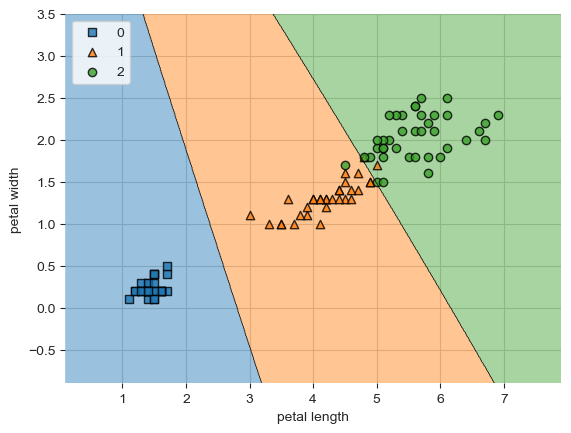

In [18]:
# RBFカーネル
iris_ksvm = SVC(kernel='rbf', C=1.0, gamma=0.3,random_state=0)
iris_ksvm.fit(X_train_2d, y_train)
# プロット
plot_decision_regions(X_train_2d, y_train,clf=iris_ksvm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')

SVM 通常用于处理线性可分的数据，即可以在特征空间中找到一个超平面，将不同类别的样本分开。 SVM 的目标是通过最大化样本到决策边界的距离（即“边界面”的“边缘”），找到一个最优的决策边界。
当数据不是完全线性可分时，SVM 可以采用“软边缘”策略，容忍一些样本落在边界面的错误范围内。
当数据在原始特征空间中不是线性可分时，SVM 使用核技巧（Kernel Trick）将数据映射到更高维度的空间，使其在新的高维空间中变得线性可分。
使用非线性变换，将原始数据映射到一个高维空间，在这个高维空间中，数据可能会变得线性可分。
在高维空间中，SVM 可以找到一个线性的决策边界，但在原始空间中，这可能对应于一个非线性的决策边界。

from sklearn.datasets import make_circles
# 生成一个示例数据集，包含两个特征和两个类别
X, y = make_circles(n_samples=100, noise=0.05, random_state=42)

# 使用径向基函数核（RBF核）的SVM进行训练
svm = SVC(kernel='rbf', C=1.0, gamma=1.0)
svm.fit(X, y)

# 绘制决策边界
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50)
plot_decision_regions(X, y, clf=svm, legend=2)

# 添加轴标签和图例
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linear Decision Boundary with RBF Kernel SVM')

# 多クラスの分類

在支持向量机（Support Vector Machine，SVM）中，处理多类别问题时，一种常用的方法是使用一对多（One-vs-Rest，OvR）或一对一（One-vs-One，OvO）的策略。以下是两种常见的方法：

一对多（OvR）：

对于每个类别，训练一个二元分类器，该分类器将该类别与其他所有类别区分开。
在预测时，使用所有分类器进行预测，选择具有最高置信度的类别作为最终的预测结果。
类别不平衡： 当类别数量很大时，可能会导致不同类别的样本数量差异很大，这可能会影响分类器的性能。
不适用于不同类别之间有重叠的情况： 如果类别之间存在相互重叠的区域，OvR 可能无法处理这种情况。
OvR 策略需要 N 个分类器。

一对一（OvO）：

对于每一对类别，训练一个二元分类器，该分类器将这两个类别区分开。
在预测时，使用所有分类器进行投票，选择获得最多投票的类别作为最终的预测结果。
在Scikit-Learn中，SVC 类（支持向量分类器）实现了多类别分类。默认情况下，SVC 使用一对一（OvO）策略。你可以通过设置 decision_function_shape 参数来选择使用 OvR 策略。
计算开销： OvO 方法的主要缺点是计算开销较大。对于 N 个类别，需要训练 N(N-1)/2 个分类器。
不适用于大规模类别： 当类别数量非常大时，OvO 的计算开销会变得非常昂贵。


In [28]:
X = iris.data
y = iris.target

# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建一个支持向量机分类器，默认使用 OvO 策略
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')

# 训练分类器
svm_classifier.fit(X_train, y_train)

# 预测测试集
y_pred = svm_classifier.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [32]:
#SVR
cars = pd.read_csv("cars.csv", index_col=0)
# 整形（xを配列の配列にする）
cars_x = np.array(cars.speed).reshape(-1,1) #cars.speed: 提取 cars 数据中的 speed 列;.reshape(-1, 1): 将提取出的一维数组转换成二维数组，其中列数为 1。参数 -1 表示根据数组的长度自动计算行数，以确保数组的维度正确。
cars_y = np.array(cars.dist)
from scipy import stats
cars_reg = stats.linregress(cars)
from sklearn.svm import SVR
cars_svr = SVR(kernel='linear', epsilon=5)
cars_svr.fit(cars_x, cars_y)
# 傾き
print(cars_reg.slope)
# 切片
print(cars_reg.intercept)
# 傾き
print(cars_svr.coef_)
# 切片
print(cars_svr.intercept_)


3.9324087591240864
-17.579094890510937
[[3.71428571]]
[-17.28571429]


(-30.0, 130.0)

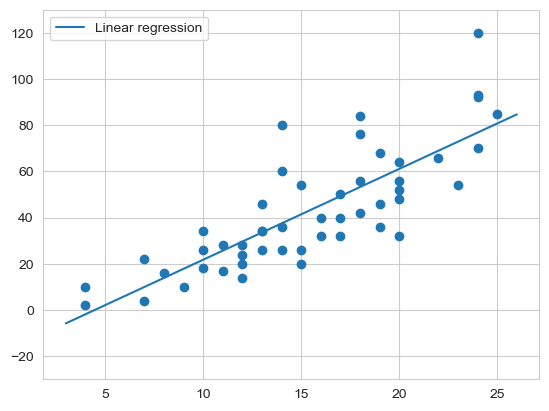

In [33]:
# xすなわちcars.speedの範囲の値の列（ベクトル）を作成
x = np.arange(3, 27)
# 対応する予測値の値をベクトル演算
y = cars_reg.slope * x + cars_reg.intercept
# 散布図と直線を重ねがき
plt.scatter(cars.speed, cars.dist)
plt.plot(x, y, label='Linear regression')
plt.legend(loc='upper left')
# 比較しやすくするためにyの範囲をそろえる
plt.ylim(-30, 130)

(-30.0, 130.0)

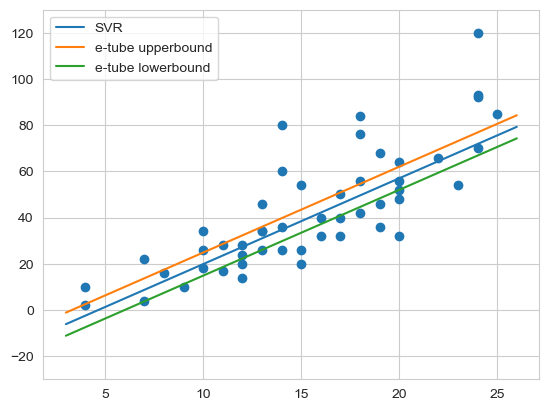

In [34]:
x = np.arange(3, 27)
y = cars_svr.coef_[0] * x + cars_svr.intercept_
# イプシロンの範囲（e-tube）の上限・下限を計算
e_upper = y + cars_svr.epsilon
e_lower = y - cars_svr.epsilon
# 散布図と直線を重ねがき
plt.scatter(cars.speed, cars.dist)
plt.plot(x, y, label='SVR')
plt.plot(x, e_upper, label='e-tube upperbound')
plt.plot(x, e_lower, label='e-tube lowerbound')
plt.legend(loc='upper left')
plt.ylim(-30, 130)

array([[ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6.6],
       [ 6.7],
       [ 6.8],
       [ 6.9],
       [ 7. ],
       [ 7.1],
       [ 7.2],
       [ 7.3],
       [ 7.4],
       [ 7.5],
       [ 7.6],
       [ 7.7],
       [ 7.8],
       [ 7.9],
       [ 8. ],
       [ 8.1],
       [ 8.2],
       [ 8.3],
       [ 8.4],
       [ 8.5],
       [ 8.6],
       [ 8.7],
       [ 8.8],
       [ 8.9],
       [ 9. ],
       [ 9.1],
       [ 9.2],
       [ 9.3],
       [ 9.4],
       [ 9.5],
       [ 9

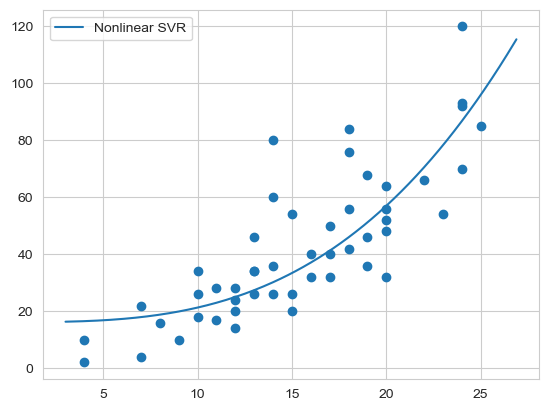

In [40]:
#非線形SVRの実行

cars_svr2 = SVR(kernel='poly', epsilon=5)
cars_svr2.fit(cars_x, cars_y)
# プロット
x = np.arange(3, 27, 0.1).reshape(-1, 1)#把列数据转化成二维数组作为机器学习的输入
y = cars_svr2.predict(x)
plt.scatter(cars.speed, cars.dist)
plt.plot(x, y, label='Nonlinear SVR')
plt.legend(loc='upper left')
x